**Task for ML Intern**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout

# Task 1: Data Exploration and Preprocessing
# Load Dataset
file_path = r"/content/TASK-ML-INTERN.csv"
df = pd.read_csv(file_path)

# Drop ID Column
df = df.drop(columns=['hsi_id'])

# Separate Features and Target
X = df.iloc[:, :-1]  # Spectral bands
y = df['vomitoxin_ppb']  # Target

# Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

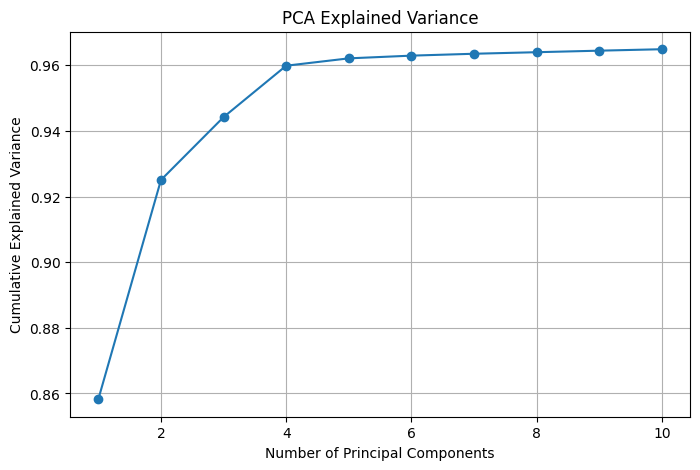

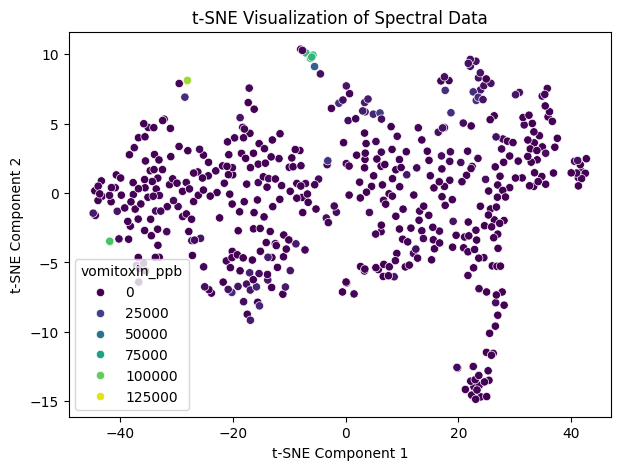

In [18]:
#Task 2
# PCA for Dimensionality Reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA Variance Explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="viridis")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Spectral Data")
plt.show()

In [19]:
#Task 3
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Hyperparameter Optimization for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Hyperparameter Optimization for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

xgb = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

In [24]:
#Task 4
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R² Score": r2}

# Evaluate both models
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Display results
rf_results, xgb_results

({'Model': 'Random Forest',
  'MAE': 3183.953423849891,
  'RMSE': 11292.833583625224,
  'R² Score': 0.5437818118261585},
 {'Model': 'XGBoost',
  'MAE': 3447.324462890625,
  'RMSE': 13587.914630288196,
  'R² Score': 0.33950066566467285})

In [26]:
#Task 5
# CNN Model
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
from tensorflow.keras.layers import Input

cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),  # Explicit input layer
    Conv1D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=16, validation_data=(X_test_cnn, y_test))

# Predictions from CNN
y_pred_cnn = cnn_model.predict(X_test_cnn)

evaluate_model(y_test, y_pred_cnn.flatten(), "CNN")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 155868880.0000 - val_loss: 298990688.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 136578624.0000 - val_loss: 298952864.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 133587928.0000 - val_loss: 298858976.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 197131744.0000 - val_loss: 298690944.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 125894864.0000 - val_loss: 298419424.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 240164592.0000 - val_loss: 297922912.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 136113712.0000 - val_loss: 297306176.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 118967824.0000 - val_loss: 296442400.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 124713448.0000 - val_loss: 295384320.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 220547536.0000 - val_loss: 294038880.000

{'Model': 'CNN',
 'MAE': 5088.14697265625,
 'RMSE': 15354.518813691297,
 'R² Score': 0.15658915042877197}

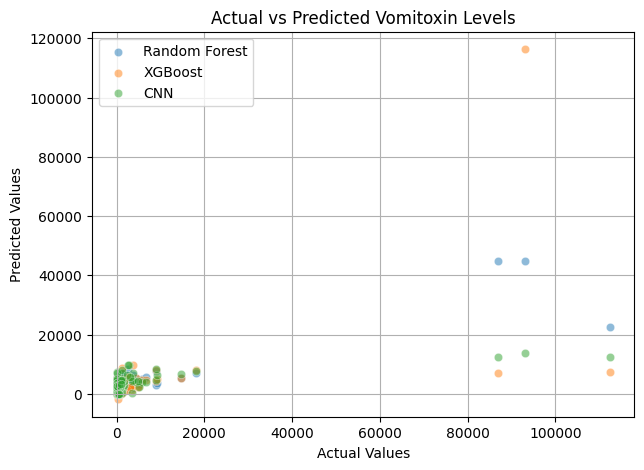

In [22]:
#Task 6
# Scatter Plot for Model Predictions
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred_xgb, label="XGBoost", alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred_cnn.flatten(), label="CNN", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Vomitoxin Levels")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Store model results in a dictionary
model_results = {
    "Random Forest": rf_results,
    "XGBoost": xgb_results
}

# Find the best-performing model based on highest R² Score
best_model = max(model_results, key=lambda x: model_results[x]["R² Score"])
print(f"Best-performing model: {best_model}")
print(model_results[best_model])


Best-performing model: Random Forest
{'Model': 'Random Forest', 'MAE': 3183.953423849891, 'RMSE': 11292.833583625224, 'R² Score': 0.5437818118261585}
